In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

In [2]:
# import data 
DATASET_SIZE = 70000
TRAIN_RATIO = 0.7
VALIDATION_RATIO = 0.2
TEST_RATIO = 0.1

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x = np.concatenate([x_train, x_test])
y = np.concatenate([y_train, y_test])

x_train_orig, x_valid_orig, y_train_orig, y_valid_orig = train_test_split(x, y, test_size=(1-TRAIN_RATIO))
x_valid_orig, x_test_orig, y_valid_orig, y_test_orig = train_test_split(x_valid_orig, y_valid_orig, test_size=((TEST_RATIO/(VALIDATION_RATIO+TEST_RATIO))))

In [3]:
# reshape 
x_train = x_train_orig.reshape(x_train_orig.shape[0], -1).astype('float32')/255.
y_train = y_train_orig

x_valid = x_valid_orig.reshape(x_valid_orig.shape[0], -1).astype('float32')/255.
y_valid = y_valid_orig

x_test = x_test_orig.reshape(x_test_orig.shape[0], -1).astype('float32')/255.
y_test = y_test_orig

In [4]:
# define model 
# Neural network 

input_size = 784
m_size = 2**5
hidden_size = 128
output_size = 10

# encoding 
input_img = tf.keras.Input(shape=(input_size,))


# middle layer 
m_layer = Dense(m_size, activation='relu')(input_img) # cos 
    #m_layer = Dense(m_size, activation='relu')(h2_layer)

output_img = Dense(output_size, activation='sigmoid')(m_layer) # linear 

model = Model(input_img, output_img)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
# training setting 
model.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', 
              metrics=['accuracy'])

M = 100
seed = 1
tf.random.set_seed(seed)
history = model.fit(x=x_train, y=y_train, validation_data = (x_valid, y_valid), 
          epochs=M, batch_size=32, verbose=2)

Epoch 1/100
1532/1532 - 2s - loss: 0.7995 - accuracy: 0.7908 - val_loss: 0.4170 - val_accuracy: 0.8857 - 2s/epoch - 2ms/step
Epoch 2/100
1532/1532 - 2s - loss: 0.3770 - accuracy: 0.8956 - val_loss: 0.3332 - val_accuracy: 0.9061 - 2s/epoch - 981us/step
Epoch 3/100
1532/1532 - 2s - loss: 0.3233 - accuracy: 0.9093 - val_loss: 0.2991 - val_accuracy: 0.9150 - 2s/epoch - 1ms/step
Epoch 4/100
1532/1532 - 2s - loss: 0.2939 - accuracy: 0.9168 - val_loss: 0.2752 - val_accuracy: 0.9206 - 2s/epoch - 1ms/step
Epoch 5/100
1532/1532 - 2s - loss: 0.2729 - accuracy: 0.9225 - val_loss: 0.2592 - val_accuracy: 0.9257 - 2s/epoch - 1ms/step
Epoch 6/100
1532/1532 - 2s - loss: 0.2570 - accuracy: 0.9277 - val_loss: 0.2491 - val_accuracy: 0.9281 - 2s/epoch - 1ms/step
Epoch 7/100
1532/1532 - 2s - loss: 0.2438 - accuracy: 0.9310 - val_loss: 0.2361 - val_accuracy: 0.9317 - 2s/epoch - 1ms/step
Epoch 8/100
1532/1532 - 2s - loss: 0.2325 - accuracy: 0.9345 - val_loss: 0.2281 - val_accuracy: 0.9333 - 2s/epoch - 1ms/ste

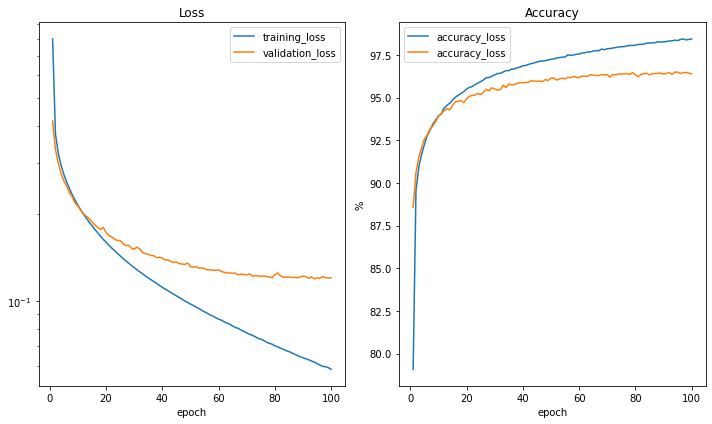

In [6]:
loss_train = history.history['loss']
loss_valid = history.history['val_loss']
accuracy_train = history.history['accuracy']
accuracy_train = np.reshape(accuracy_train, (M,1))
accuracy_valid = history.history['val_accuracy']
accuracy_valid = np.reshape(accuracy_valid, (M,1))


plt.figure(figsize=(10, 6))
epoch_list = np.arange(1, M+1)
plt.subplot(1, 2,  1)
plt.semilogy(epoch_list, loss_train, label = 'training_loss')
plt.semilogy(epoch_list, loss_valid, label = 'validation_loss')
plt.legend()
plt.xlabel('epoch')
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(epoch_list, accuracy_train*100, label = 'accuracy_loss')
plt.plot(epoch_list, accuracy_valid*100, label = 'accuracy_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('%')
plt.title('Accuracy')
plt.tight_layout()
plt.show()

In [7]:
pred = model.predict(x_test)
pred = np.argmax(pred, 1)
accuracy = np.mean((pred==y_test).astype('int'))
accuracy

0.9601485502071133